<script>
    document.querySelector('head').innerHTML += '<style>.slides { zoom: 1.0 !important; }</style>';
</script>
<!--# STAT 207: Data Science Exploration-->

# Unit 16: Logistic Regression - Part 2

## <u>Case Study</u>: Modelling Approval for the President's Foreign Policy with Age and Sex

We would now like to model the following response variable with the following two explanatory variables.
* <u>response</u>: approval of the president's foreign policy (approve vs. disapprove)
* <u>explanatory</u>:
    - sex
    - age
    
    

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

## 1. Analyses for Associations

#### See Unit 15 slides (section 1)

## 2. Association Analyses Summary: Numerical(s) and Categorical(s) Explanatory Variables-> Categorical Response Variable (with 2 levels)

#### See Unit 15 slides (section 2)

## 3. Why should we not use a linear regression to model a categorical response variable?

#### See Unit 15 slides (section 3)

Let's again examine our random sample of adults living in the U.S. (from 2017) from Pew Research. We will just use three variables for this analysis, so we will just create a dataframe using these three variables.

In [2]:
missing_values = ["NaN", "nan", "Don't know/Refused (VOL.)"]
#
df = pd.read_csv('Feb17public.csv', na_values=missing_values)[['age','sex','q5cf1']]
df.head()

,age,sex,q5cf1
0,80.0,Female,NaN
1,70.0,Female,Disapprove
2,69.0,Female,Disapprove
3,50.0,Male,NaN
4,70.0,Female,Disapprove


In [3]:
df.shape

(1503, 3)

We will drop all missing values from the dataframe.

In [4]:
df=df.dropna()
df.head()

,age,sex,q5cf1
1,70.0,Female,Disapprove
2,69.0,Female,Disapprove
4,70.0,Female,Disapprove
6,89.0,Female,Disapprove
7,92.0,Female,Approve


The q5cf1 variable represents the answers to the question "Do you approve or disapprove of the way Donald Trump is handling the nation's foreign policy?"

**<u>Potential Bias Warning!</u>** It looks like only 691 respondants out of the 1503 surveyed responded to this question. These 691 people may have had a strong opinion on the question and thus chose to answer it. So it is possible that this sample of 691 respondants is not entirely representative of all adults living in the U.S. (the population we would like to make inferences about).

In [5]:
df.shape

(691, 3)

In [6]:
df['q5cf1'].value_counts()

Disapprove    442
Approve       249
Name: q5cf1, dtype: int64

### 3.1. Let's first examine the relationship between age and approval for the president's foreign policy in 2017 in the sample.

By looking at the box plots below, the median age of those that approved was over 10 years higher than the median age of those that did not approve.

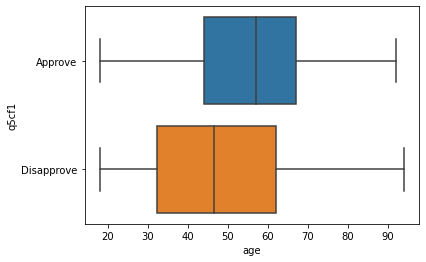

In [7]:
sns.boxplot(x='age', y='q5cf1', data=df, order=['Approve','Disapprove'])
plt.show()

### 3.2. Translate the Categorical Variable into a Numerical Variable

Because we were interested in the relationship between a categorical variable and numerical variable, side-by-side boxplots (or side-by-side violin plots) tends to be one of the best visualizations for respresenting any association between the two variables. However, if we would like to try to plot a best fit line for the relationship between these two variables (like what we do in linear regression) we will need to first tranlate our categorical variable into a numerical variable.

Below we create a new variable 'y' in our dataframe in which all 'approve' values for q5cf1 are translated into a 1 and all 'disapprove' values for q5cf1 are translated into a 0.

The **.map()** function allows us to make this translation.

In [8]:
df['y']=df['q5cf1'].map({'Disapprove':0,'Approve':1})
df.head()

,age,sex,q5cf1,y
1,70.0,Female,Disapprove,0
2,69.0,Female,Disapprove,0
4,70.0,Female,Disapprove,0
6,89.0,Female,Disapprove,0
7,92.0,Female,Approve,1


In general, we call 

* the level in which y=1 the **success level** of the response variable (ie. the level that we are interested in) and
* the level in which y=0 the **failure level** of the response variable (ie. the level that we are not interested in).


In [9]:
mod1 = smf.logit(formula='y ~ age+sex', data=df).fit()
mod1.summary()

Optimization terminated successfully.
         Current function value: 0.612754
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  691
Model:                          Logit   Df Residuals:                      688
Method:                           MLE   Df Model:                            2
Date:                Thu, 08 Apr 2021   Pseudo R-squ.:                 0.06252
Time:                        13:36:48   Log-Likelihood:                -423.41
converged:                       True   LL-Null:                       -451.65
Covariance Type:            nonrobust   LLR p-value:                 5.457e-13
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.3609      0.288     -8.190      0.000      -2.926      -1.796
sex[T.Male]     0.8856      0.167      5.296      0.000       0.558       1.213
age             0.0260      0.005      5.466      0.000       0.017       0.035
===============================================================================
"""

### 1.1 Checking Conditions for Inference (and Model Fit) on $\beta_0, \beta_1, ...\beta_p$ in a Logistic Regression Model 

#### See Unit 16 slides (section 1.1)

**Ex:**  We would like to conduct inference on the intercept and slopes in the population logistic regression model. Check the conditions for model fit and inference first.

#### <u>Condition 1</u>: Independence of Observations Condition

a. [NOT SURE IF MET] While the initial survey of 1503 adults living in the U.S. was random, the sample of the n=691 people answered the question about the president's foreign policy was much smaller. So it may be possible that our sample size of n=691 is not random, as those that answered this question may have strong opinions about the matter.

b. [MET]$n=691<10$% of all adults living in the U.S.

So because we are not sure if both (a) and (b) are met, we are not sure if condition 1 is met.

#### <u>Condition 2</u>: Linearity Condition

We only have one numerical explanatory variable (age), so we will fit a simple logistic regression curve to the scatterplot of x=age and y=0/1 response variable.

We do see a *slight* S-Shape in this curve below, so we can say that thsi condition is met.


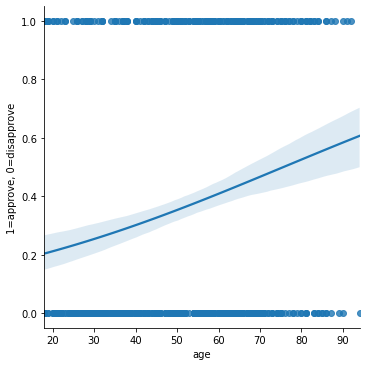

In [10]:
sns.lmplot(x="age", y='y',data=df, logistic=True)
plt.ylabel('1=approve, 0=disapprove')
plt.show()

#### <u>Condition 3</u>: No Multi-Collinearity Condition

We only have one numerical explanatory variable (age), so we do not need to check this condition in this case. However, you would want to check this condition in the same way that you would with your multiple linear regression models.

If you see a strong linear relationship between any pair of explanatory numerical variables, then this condition would not be met.

#### So because of condition 1, we are not entirely sure if ALL of these conditions are met. Thus it may be possible that our logistic regression model that predicts the probability of an adult in the sample of approving of the president's foreign policy (ie. y=1) with age and sex, is not the best fit of the data and for conducting valid inferences. But we will proceed with caution.

### 1.2 Create a 90% confidence interval for the age slope in the logistic regression model.

#### 1.2.0. Check the conditions for conducting inference on this slopes.

We have already checked these conditions in 1.1, and we are unsure if they are met. Thus it may be possible that the inferences and interpretations that we make with this confidence interval may be slightly off, but we will proceed with caution.

In [11]:
mod1 = smf.logit(formula='y ~ age+sex', data=df).fit()
mod1.summary()

Optimization terminated successfully.
         Current function value: 0.612754
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  691
Model:                          Logit   Df Residuals:                      688
Method:                           MLE   Df Model:                            2
Date:                Thu, 08 Apr 2021   Pseudo R-squ.:                 0.06252
Time:                        13:36:51   Log-Likelihood:                -423.41
converged:                       True   LL-Null:                       -451.65
Covariance Type:            nonrobust   LLR p-value:                 5.457e-13
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.3609      0.288     -8.190      0.000      -2.926      -1.796
sex[T.Male]     0.8856      0.167      5.296      0.000       0.558       1.213
age             0.0260      0.005      5.466      0.000       0.017       0.035
===============================================================================
"""

#### 1.2.1. What is the point estimate (ie. sample statistic) for this confidence interval?

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>


In [12]:
point_estimate=0.0260
print('Point Estimate', point_estimate)

Point Estimate 0.026


#### 1.2.2. What is the standard error for this confidence interval?

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

In [13]:
standard_error=0.005
print('Standard Error:', standard_error)

Standard Error: 0.005


#### 1.2.3 What is the critical value for this confidence interval?
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

In [14]:
from scipy.stats import norm
critical_value=norm.ppf(0.95)
print("Critical Value", critical_value)

Critical Value 1.6448536269514722


#### 1.2.4 Putting it all together, our 90% confidence interval is:

$(\hat{\beta}_3-z^*SE_{\hat{\beta}_3}, \hat{\beta}_3+z^*SE_{\hat{\beta}_3})$

$(0.026-(1.645)(0.005), 0.026+(1.645)(0.005))$

$(0.0178, 0.0342)$

In [15]:
lower_bound=point_estimate-critical_value*standard_error
upper_bound=point_estimate+critical_value*standard_error

print('90% Confidence Interval for Age Population Slope:', lower_bound, upper_bound)

90% Confidence Interval for Age Population Slope: 0.017775731865242637 0.03422426813475736


#### 1.2.5 Interpreting the Confidence Interval

We are 90% confident that $\beta_3$, the population slope for age in the logistic regression model is between 0.0178 and 0.0342.

#### 1.2.6. Create a 90% confidence interval for the <u>odds multiplier</u> corresponding to age in the population logistic regression model.

Remember that we call $e^{\beta_i}$ the odds multiplier that corresponds to the given explanatory variable or indicator variable. So we want to calculate a 90% confidence interval for $e^{\beta_3}$ (as $x_3$ corresponds to the age explanatory variable).

So all we have to do is exponentiate the lower and upper bounds of the 90% confidence interval for $\beta_3$.

$(e^{0.0178}, e^{0.0342})$

$(1.018, 1.035)$

In [16]:
print('90% Confidence Interval for Age Odds Multiplier $$e^{\beta_3}$$:', np.exp(lower_bound), np.exp(upper_bound))

90% Confidence Interval for Age Odds Multiplier $$e^{eta_3}$$: 1.0179346604811483 1.0348166571078978


#### 1.2.7 Interpret this 90% confidence interval for the <u>odds multiplier</u> corresponding to age in the population logistic regression model.

<u>Basic Interpretation</u>:

We are 90% confident that $e^{\beta_3}$ is between 1.018 and 1.035 in the population logistic regression model that predicts the probability that an observation in the population approves the president's foreign policy (ie. y=1) given age and sex.


<u>More Informative Interpretation</u>:

We are 90% confident that we would expect the odds that an observation in the population approves of the president's foreign policy to increase by a multiple of 1.018 and 1.035, on average, if we were to increase age by one year.

### 1.3. Conducting Hypothesis Testing on $\beta_0, \beta_1, ...,\beta_p$ (individually) in a logistic regression model.

#### See Unit 16 slides (section 1.3)

### Test whether there is sufficient evidence to suggest that the population slope for age is non-zero in the logistic regression model (which predicts the probability for approval for the president’s foreign policy given age and sex.)

#### 1.3.1 Set up hypotheses for this test.

<u>One Option</u>

$H_0: \beta_3=0$

$H_A: \beta_3\neq 0$.

<u>Another Option</u>

$H_0: e^{\beta_3}=1$

$H_A: e^{\beta_3}\neq 1$.

#### 1.3.2 Check the conditions for conducting this hypothesis test.

We have already checked these conditions in 1.1, and we are unsure if they are met. Thus it may be possible that the inferences and interpretations that we make with this confidence interval may be slightly off, but we will proceed with caution.

In [17]:
mod1 = smf.logit(formula='y ~ age+sex', data=df).fit()
mod1.summary()

Optimization terminated successfully.
         Current function value: 0.612754
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  691
Model:                          Logit   Df Residuals:                      688
Method:                           MLE   Df Model:                            2
Date:                Thu, 08 Apr 2021   Pseudo R-squ.:                 0.06252
Time:                        13:36:51   Log-Likelihood:                -423.41
converged:                       True   LL-Null:                       -451.65
Covariance Type:            nonrobust   LLR p-value:                 5.457e-13
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.3609      0.288     -8.190      0.000      -2.926      -1.796
sex[T.Male]     0.8856      0.167      5.296      0.000       0.558       1.213
age             0.0260      0.005      5.466      0.000       0.017       0.035
===============================================================================
"""

#### 1.3.3 Find the test statistic for this hyothesis test using the summary output table for the sample logistic regression model.

In [18]:
test_statistic=5.466
print('Test Statistic:', test_statistic)

Test Statistic: 5.466


#### 1.3.4 Calculate this test statistic by hand (using other information from the summary output table for the sample logistic regression model).

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

In [19]:
point_estimate=0.0260
standard_error=0.005

In [20]:
test_statistic=(point_estimate-0)/standard_error
print('Test Statistic:', test_statistic)

Test Statistic: 5.199999999999999


These value may be slightly off due to rounding errors.

#### 1.3.5 Find the p-value for this hypothesis test in the summary output table for the sample logistic regression model.

The p-value that we see int the summary output table for this hypothesis test is very small ($<0.0001$).

#### 1.3.6. Using the test statistic (from the summary output table) calculate the p-value "by hand".
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

In [21]:
test_statistic=5.466
pvalue=2*(1-norm.cdf(np.abs(test_statistic)))
print('p-value:', pvalue)

p-value: 4.603043346484981e-08


#### 1.3.7. Make a conclusion about your hypothesis using this p-value, using a significance level of $\alpha=0.10$.

Because the $p-value=4.603\times 10^{-8}<\alpha=0.10$, we reject the null hypothesis. Thus we can say the following:
* there is sufficient evidence to suggest that the population slope for age in this model is non-zero (ie. $\beta_3\neq 0$).
* there is sufficient evidence to suggest that the population odds multiplier for age in this model is not equal to 1 (ie. $e^{\beta_3}\neq 1$).

#### 1.3.8. Make a conclusion about your hypothesis using this p-value, using your 90% confidence interval for the population slope for age (ie. $\beta_3$).

Because the null value $\beta_3=0$ is not in our 90% confidence interval for $\beta_3$ (the population slope for age) $(0.0178, 0.0342)$, we reject the null hypothesis. Thus we can say the following:
* there is sufficient evidence to suggest that the population slope for age in this model is non-zero (ie. $\beta_3\neq 0$).
* there is sufficient evidence to suggest that the population odds multiplier for age in this model is not equal to 1 (ie. $e^{\beta_3}\neq 1$).

#### 1.3.9. Make a conclusion about your hypothesis using this p-value, using your 90% confidence interval for the population odds multiplier for age (ie. $e^{\beta_3}$).

Because the null value $e^{\beta_3}=1$ is not in our 90% confidence interval for $e^{\beta_3}$ (the population odds multplier for age) $(1.018, 1.035)$, we reject the null hypothesis. Thus we can say the following:
* there is sufficient evidence to suggest that the population slope for age in this model is non-zero (ie. $\beta_3\neq 0$).
* there is sufficient evidence to suggest that the population odds multiplier for age in this model is not equal to 1 (ie. $e^{\beta_3}\neq 1$).

## 2. Modeling Interaction Effects in a Logistic Regression Model

#### See Unit 16 slides (section 2)

### 2.1. In the Jupyter notebook, create a logistic regression model that predicts the probability that a person in the sample approves of the president’s foreign policy given:
* sex,
* age, and
* the interaction between sex and age.



In [22]:
mod2 = smf.logit(formula='y ~ age+sex+age*sex', data=df).fit()
mod2.summary()

Optimization terminated successfully.
         Current function value: 0.612268
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  691
Model:                          Logit   Df Residuals:                      687
Method:                           MLE   Df Model:                            3
Date:                Thu, 08 Apr 2021   Pseudo R-squ.:                 0.06326
Time:                        13:36:51   Log-Likelihood:                -423.08
converged:                       True   LL-Null:                       -451.65
Covariance Type:            nonrobust   LLR p-value:                 2.392e-12
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.1418      0.387     -5.530      0.000      -2.901      -1.383
sex[T.Male]         0.4760      0.525      0.906      0.365      -0.553       1.505
age                 0.0220      0.007      3.253      0.001       0.009       0.035
age:sex[T.Male]     0.0078      0.010      0.820      0.412      -0.011       0.026
===================================================================================
"""

### 2.2 Write out the resulting logistic regression model for the sample.

$log(\frac{\hat{p}}{1-\hat{p}} ) = -2.1418 +0.4760sex[T.Male] +0.0220age +0.0078(age\cdot sex[T.Male])$

### 2.3 Use this model to predict the probability that 19 year old male supported the president’s foreign policy (in 2017).

First we can find the predicted log-odds for this person.

<u>By hand</u>:

$log(\frac{\hat{p}}{1-\hat{p}} ) = -2.1418 +0.4760(1) +0.0220(19) +0.0078(19\cdot 1)=-1.0996$

In [23]:
log_odds=-2.1418 +0.4760*(1) +0.0220*(19) +0.0078*(19* 1)
print('Predicted Log Odds for 19-year-old male approving of the presidents foreign policy:', log_odds)

Predicted Log Odds for 19-year-old male approving of the presidents foreign policy: -1.0996000000000001


In [24]:
odds=np.exp(log_odds)
print('Predicted Odds for 19-year-old male approving of the presidents foreign policy::', odds)

Predicted Odds for 19-year-old male approving of the presidents foreign policy:: 0.3330042587647964


In [25]:
predictive_probability=odds/(1+odds)
print('Predictive Probability for 19-year-old male approving of the presidents foreign policy::', predictive_probability)

Predictive Probability for 19-year-old male approving of the presidents foreign policy:: 0.24981484985904592


<u>With Python</u>:

In [26]:
mod2.predict(exog=dict(sex='Male',age=19)).iloc[0]

0.24992333217292967

---
STAT 207, Victoria Ellison and Douglas Simpson, University of Illinois at Urbana-Champaign